# Ab-initio basic molecular dynamics simulations

Project Objective inspired by Imperial College UG and targeted HKUST Phd Program

## The model

I am aiming to create a numerical simulation program to discribe the motion of an ensemble of classical particles in a 2 dimentional space. Unlike the ideal gas model, we will consider that the particles possess volume (area in 2d) and therefore collide with each other. Appart from these collisions I consider no other interaction between particles.

Such simulation is one of the simplest examples of a class of simulation methods called [molecular dynamics](https://en.wikipedia.org/wiki/Molecular_dynamics), describing the time evolution of an ensemble of particles according to classical dynamics. In spite of its simplicity, such hard disks model is able to give insight on important results from thermodynamics, reaction kinetics, the structure of dense fluids, or phase transition.

In [ ]:
# preliminary imports
import numpy as np
from scripts.support_funcs import animate_trajectory, display_particle, display_vecs, display_trajectory, Vector
from scripts.base_functions import Particle, Simulation

## Building a Particle Class

In [ ]:
#sample particle in 2D (position, momentum, radius, mass)
par = Particle(Vector(0,1), Vector(100,100), 0.5, 2)

## Making the particle move

In a small amount of time $\Delta t$ the position will change via:

$$\vec{r}(t+\Delta t)=\vec{r}(t)+\vec{v}(t)\times \Delta t$$

where $\vec{r}(t)$ is the position at time $t$, $\vec{v}(t)$ is velocity and $\Delta t$ is the time step.

The trajectory of the particle, undersood in this context as a sequence of particle positions recorded in consecutive time steps, is obtained by running our simulation for a certain number of time steps, during each step we will use the velocity to update the position and then record the particle using the list.

In [15]:
no_steps = 1000
dt = 0.01

trajectory = []
for onestep in range(no_steps):
    lolz = par.copy()
    lolz.position = lolz.position + lolz.velocity()*dt*onestep
    trajectory.append(lolz)

## Building a Simulation class

In [17]:
particles = [Particle(Vector(0.5,0),Vector(0,1),1,1),
             Particle(Vector(0.5,1),Vector(0,-1),1,1),
             Particle(Vector(0,0), Vector(0.5,0.5),1,1)]

s=Simulation(particles, 100,1)

#testing
print(s.particles[0].position.y)
s.step()
print(s.particles[0].position.y)
s.step()
print(s.particles[0].position.y)

0.0
1.0
2.0


## Recording the state of the simulation

In [19]:
particles = [Particle(Vector(10,0),Vector(0,0.75),1,1),
             Particle(Vector(50,10),Vector(0,0.5),1,1),
             Particle(Vector(0,0), Vector(0.5,0.75),1,1)]

no_steps = 300

s=Simulation(particles, 100, 0.5)
for i in range(no_steps):
    s.step()

# Simulation outputs record_states - a list of Vector positions
animate_trajectory(s)

## Generating initial conditions

The outcome of each simulation will depend strongly on the initial state of the system, so that each Simulation object is created with initial conditions specified by a list of particle objects.

In [22]:
from numpy.random import random

box_length=100
N=100
radius=1
p_max=2
init_random=[]
for p in range(1,N+1):
    pos_x=random()*(box_length-2*radius)+radius   #avoid initial position too close to the walls
    pos_y=random()*(box_length-2*radius)+radius
    pos=Vector(pos_x,pos_y)
    mom_x=(random()-0.5)*2*p_max                  #allow for positive and negative momenta
    mom_y=(random()-0.5)*2*p_max
    mom=Vector(mom_x,mom_y)
    init_random.append(Particle(pos,mom,radius,1))

simu = Simulation(init_random, box_length, 0.5)
no_steps = 300
for i in range(no_steps):
    simu.step()
animate_trajectory(simu)

# Collisions

## Boundary Collision

In [24]:
# after adding apply_box_collisions to consider boundary (box) - particle collisions
def test_box():
    box_length = 100
    no_steps = 300
    
    p1 = Particle(position=Vector(10,50), momentum=Vector(-1,0),radius=1,mass=1)
    p2 = Particle(position=Vector(50,90), momentum=Vector(0,1) ,radius=1,mass=1)
    p3 = Particle(position=Vector(50,10), momentum=Vector(0,-1),radius=1,mass=1)
    p4 = Particle(position=Vector(90,50), momentum=Vector(1,0) ,radius=1,mass=1)

    box_particles = [p1,p2,p3,p4]

    s = Simulation(box_particles, box_length=100, dt=0.1)
    for i in range(300):
        s.step()
    animate_trajectory(s,loop=True)

test_box()

## Particle Collisions

In [25]:
# include collisions in one-dimension
def test_1d_collision():
    box_length = 100
    no_steps = 300

    p1 = Particle(position = Vector(10,10), momentum=Vector(1,0),radius=1,mass=1)
    p2 = Particle(position = Vector(20,10), momentum=Vector(0,0) ,radius=1,mass=1)
    
    test_case = [p1,p2]
    s=Simulation(particles=test_case,box_length=100,dt=0.05)

    for i in range(500):
        s.step()
    animate_trajectory(s,loop=True)

test_1d_collision()

In [26]:
# include collisions in two-dimensions
def test_2d_collision():
    box_length = 100
    no_steps = 300

    p1 = Particle(position = Vector(10,10), momentum=Vector(1,0.5),radius=1,mass=1)
    p2 = Particle(position = Vector(20,15), momentum=Vector(0,0) ,radius=1,mass=1)
    
    test_case = [p1,p2]
    s=Simulation(particles=test_case,box_length=100,dt=0.05)

    for i in range(500):
        s.step()
    animate_trajectory(s,loop=True)

test_2d_collision()

### Enhancing the Particle class

In [27]:
# include whether particles are initiated or collide as overlap 
p1 = Particle(position = Vector(10,10), momentum=Vector(1,0),radius=1,mass=1)
p2 = Particle(position = Vector(12,10), momentum=Vector(0,0),radius=1,mass=1)
p1.overlap(p2)

False

# Saving the simulation

In [4]:
p1 = Particle(position=Vector(20,20), momentum=Vector(2,0),radius=1,mass=1)
p2 = Particle(position=Vector(25,20), momentum=Vector(4,0),radius=1,mass=1)
p3 = Particle(position=Vector(40,20), momentum=Vector(5,0),radius=1,mass=1)
p4 = Particle(position=Vector(60,20), momentum=Vector(-2,0),radius=1,mass=1)

particles = [p1,p2,p3,p4]

s = Simulation(particles, 100, 0.1)
for step in range(200):
    s.step()

In [5]:
# pickle to save as binary file
import pickle

data_f = open('test_simulation.dat','wb')
pickle.dump(s,data_f)
data_f.close()

In [6]:
# unpickle to load binary file
data_f = open('test_simulation.dat','rb')
loaded_s = pickle.load(data_f)
data_f.close()

## 1D collisions

In [28]:
box_length = 100
no_steps = 300
p1 = Particle(position = Vector(10,10), momentum=Vector(3,0),radius=1,mass=1)
p2 = Particle(position = Vector(14,10), momentum=Vector(1,0) ,radius=1,mass=1)
    
test_case = [p1,p2]
s=Simulation(particles=test_case,box_length=100,dt=0.05)
for i in range(300):
        s.step()
animate_trajectory(s,loop=True)


## 2D collisions

### Projecting the momentum along the normal and tangent axes

To workout the component of a vector in the direction of a particular axis, we need to calculate the dot product of the vector with that particular axis multipled by the axis vector itself. Shown below is a figure (by user Acdx, from [wikimedia commons](https://upload.wikimedia.org/wikipedia/commons/f/fd/3D_Vector.svg)) for a 3 dimensional vector **a**, axis vectors **i**,**j**, and **k** and vector components $\textbf a_x$, $\textbf a_y$ and $\textbf a_z$.

<img src="https://upload.wikimedia.org/wikipedia/commons/f/fd/3D_Vector.svg" />



2d collisions omplemented as follows: 

* check if moving towards eachother
* compute the normal axis
* compute the projection of the momentum onto the normal and tangent axes
* update the normal projected momentum in light of the collision
* compute  the new total momentum

In [52]:
test_2d_collision()

In [3]:
from numpy.random import random

box_length=100
N=200
radius=1
p_max=2
init_random=[]
for p in range(1,N+1):
    pos_x=random()*(box_length-2*radius)+radius   #avoid initial position too close to the walls
    pos_y=random()*(box_length-2*radius)+radius
    pos=Vector(pos_x,pos_y)
    #mom_x=(random()-0.5)*2*p_max                  #allow for positive and negative momenta
    #mom_y=(random()-0.5)*2*p_max
    mom=Vector(0.5,0.5)
    init_random.append(Particle(pos,mom,radius,1))
    
simu = Simulation(init_random, box_length, 0.25)
no_steps = 10000
for i in range(no_steps):
    simu.step()
animate_trajectory(simu)

import pickle

data_f = open('test_simulation.dat','wb')
pickle.dump(simu,data_f)
data_f.close()

In [20]:
data_f = open('test_simulation.dat','rb')
loaded_s = pickle.load(data_f)
data_f.close()

In [21]:
animate_trajectory(loaded_s)

## Allowing for particles with different masses

The correct formula for a 1D collision in the case of different particle masses is:
    
$$\vec{p'}_1 = \frac{(m_1-m_2)\vec{p}_1+2m_1\vec{p}_2}{m_1+m_2}$$
$$\vec{p'}_2 = \frac{(m_2-m_1)\vec{p}_2+2m_2\vec{p}_1}{m_1+m_2}$$

In [32]:
def test_collision_bug():
    box_length = 100
    no_steps = 300

    p1 = Particle(position = Vector(25,25), momentum=Vector(3,3),radius=1,mass=3)
    p2 = Particle(position = Vector(35,30), momentum=Vector(-1,0) ,radius=1,mass=1)
    p3 = Particle(position = Vector(40,60), momentum=Vector(3,0),radius=1,mass=3)
    p4 = Particle(position = Vector(60,60), momentum=Vector(-1,0) ,radius=1,mass=1)
    p5 = Particle(position = Vector(70,20), momentum=Vector(0,2),radius=1,mass=1)
    p6 = Particle(position = Vector(80,30), momentum=Vector(-4,0) ,radius=1,mass=2)
    
    
    test_case = [p1,p2, p3, p4,p5, p6]
    
    s=Simulation(particles=test_case,box_length=100,dt=0.25)

    for i in range(500):
        s.step()
    animate_trajectory(s,loop=True, interval=85)

test_collision_bug()

## Looking at Physical Quantities

### Energy as a function of time

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


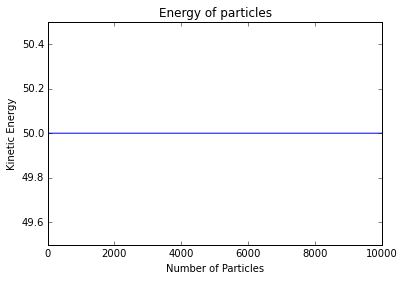

In [22]:

total_KE=[]
for i in range(len(loaded_s.trajectory)):
    KE=0
    for j in range(len(loaded_s.trajectory[i])):
        velocity = loaded_s.trajectory[i][j].velocity().norm()
        mass = loaded_s.trajectory[i][j].mass
        KE += (0.5*mass*(velocity)**2)
    total_KE.append(KE)
x = list(np.linspace(1,len(loaded_s.trajectory), len(loaded_s.trajectory)))
y = total_KE
plt.plot(x,y)
plt.ylim(49.5,50.5)
plt.ylabel("Kinetic Energy")
plt.xlabel("Number of Particles")
plt.title("Energy of particles")
plt.show()

### Distribution of speeds
Every recorded state defines a distribution of particle speeds. Evolution of the standard deviation of the particle speeds as a function of time to find equilibrium.

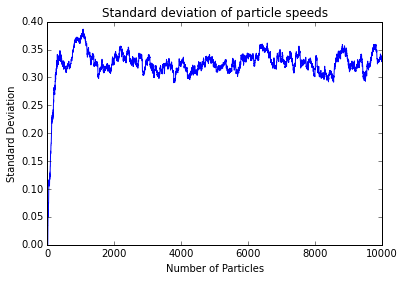

In [36]:
std_list = []
for i in range(len(loaded_s.trajectory)):
    velocities = []
    for j in range(len(loaded_s.trajectory[i])):
        velocity= loaded_s.trajectory[i][j].velocity().norm()
        velocities.append(velocity)
    std_list.append(np.std(velocities))

x = list(np.linspace(1,len(loaded_s.trajectory), len(loaded_s.trajectory)))
y= std_list
plt.plot(x,y)
plt.ylabel("Standard Deviation")
plt.xlabel("Number of Particles")
plt.title("Standard deviation of particle speeds")
plt.show()

Plot the histogram of speeds present at a specific time step.

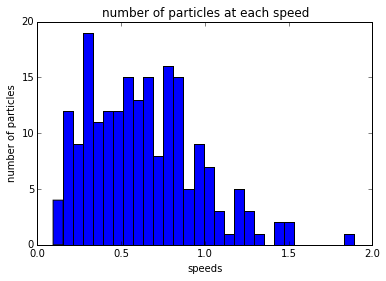

In [27]:
from ipywidgets import interact
from matplotlib.pyplot import *

@interact(t=(0,1000,1))

def plot_speeds(t):
    particle_pos = loaded_s.trajectory[t]
    velocities = []
    for item in particle_pos:
        velocity = item.velocity().norm()
        velocities.append(velocity)
    plt.clf()
    plt.hist(velocities, 30)
    plt.title("number of particles at each speed")
    plt.ylabel("number of particles")
    plt.xlabel("speeds")
    plt.show()

In [3]:
from numpy.random import random

box_length=100
N=1000
radius=1
p_max=2
init_random=[]
for p in range(1,N+1):
    pos_x=random()*(box_length-2*radius)+radius   #avoid initial position too close to the walls
    pos_y=random()*(box_length-2*radius)+radius
    pos=Vector(pos_x,pos_y)
    mom_x=(random()-0.5)*2*p_max                  #allow for positive and negative momenta
    mom_y=(random()-0.5)*2*p_max
    mom=Vector(mom_x,mom_y)
    init_random.append(Particle(pos,mom,radius,1))
    
massivesim = Simulation(init_random, box_length, 0.25)
no_steps = 500
for i in range(no_steps):
    massivesim.step()
animate_trajectory(massivesim)


data_a = open('MassiveParticleFest.dat','wb')
pickle.dump(massivesim,data_a)
data_a.close()

In [3]:
data_a = open('MassiveParticleFest.dat','rb')
loaded_a = pickle.load(data_a)
data_a.close()

In [4]:
animate_trajectory(loaded_a)

The analytical formula for the 2D Maxwell-Boltzmann distribution giving the probabilty of finding a particle with a particular speed $v$ is:
    
$$\rho(v)=\frac{m v}{k_B T} \exp\left(-\frac{mv^2}{2k_BT}\right)$$ 

Where $m$ is the mass, $k_B$ is Boltzmann's constant and $T$ is the temperature.

The relationship between the temperature and the average energy for a 2d ideal gas is:

$$\langle E \rangle= k_BT$$

In [28]:
def boltzmann(time):
    KE_list = []
    KE_sum = 0
    particle_pos = loaded_a.trajectory[time]
    for item in particle_pos:
        KE_sum += 0.5*item.momentum.norm()/item.mass
    KE_aver = KE_sum/len(loaded_a.trajectory)
    velocities = []
    probability = []
    for i in np.linspace(0,3,1000):
        mass = loaded_a.trajectory[time][0].mass
        probability.append((1/KE_aver)*i*mass*np.exp((-mass*i**2)/(2*KE_aver)))
    x = list(np.linspace(0,3,1000))
    plt.plot(x, probability)
    plt.title("boltzmann distribution")
    plt.ylabel("probability of finding a particle")
    plt.xlabel("speed")
    plt.show()

Populating the interactive namespace from numpy and matplotlib


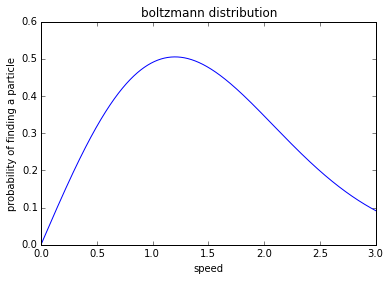

In [29]:
boltzmann(499)
#the simulation was only run for 500 steps!!

### Expansion of the gas

In [31]:
# only initiate the particles on the left side and observe the expansion to the right
box_length=100
N=100
radius=1
p_max=2
init_random=[]
for p in range(1,N+1):
    pos_x=random()*(box_length/2-2*radius)+radius   #avoid initial position too close to the walls
    pos_y=random()*(box_length-2*radius)+radius
    pos=Vector(pos_x,pos_y)
    mom_x=(random()-0.5)*2*p_max                  #allow for positive and negative momenta
    mom_y=(random()-0.5)*2*p_max
    mom=Vector(mom_x,mom_y)
    init_random.append(Particle(pos,mom,radius,1))
    
simu2 = Simulation(init_random, box_length, 0.25)
no_steps = 1000
for i in range(no_steps):
    simu2.step()
animate_trajectory(simu2)

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Populating the interactive namespace from numpy and matplotlib


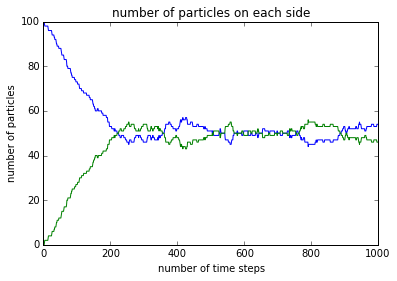

In [33]:
# vice versa 
left_side=[]
right_side=[]

for i in range(1,(len(simu2.trajectory))):
    left=[]
    right=[]
    for j in range(len(simu2.trajectory[i])):
        position= simu2.trajectory[i][j].position
        if position.x < (box_length/2):
            left.append(position.x)
        else:
            right.append(position.x)
    left_side.append(len(left))
    right_side.append(len(right))

a = list(np.linspace(1,len(simu2.trajectory), len(simu2.trajectory)-1))
b = np.array(left_side)
c = np.array(right_side)

plt.plot(a,b)
plt.plot(a,c)
plt.title("number of particles on each side")
plt.ylabel("number of particles")
plt.xlabel("number of time steps")
plt.show()